<a href="https://colab.research.google.com/github/gabrielfas/Spotify-Playlist-Analysis/blob/master/colab-notebooks/Spotify_Data_Science.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install -U -q PyDrive

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
folder_id = '1RNg99x6G_Mmh1smc3SrRz-Qk3PCj8Cys'
folder = drive.ListFile({'q': "'{}' in parents and trashed=false".format(folder_id)})

file_list = folder.GetList()

for file in file_list:
    file.GetContentFile(file['title'])
    

In [6]:
!pip install -r requirements.txt

    100% |████████████████████████████████| 14.7MB 1.8MB/s 
    100% |████████████████████████████████| 12.6MB 2.2MB/s 
    100% |████████████████████████████████| 4.0MB 9.5MB/s 
    100% |████████████████████████████████| 8.9MB 1.9MB/s 
    100% |████████████████████████████████| 215kB 28.4MB/s 
    100% |████████████████████████████████| 7.4MB 5.0MB/s 
    100% |████████████████████████████████| 952kB 19.2MB/s 
  Running setup.py bdist_wheel for bokeh ... done
  Stored in directory: /root/.cache/pip/wheels/ff/28/51/22e8d08e9d5383ee1de981aaa8ff7bc53c7d65022e5101400f
  Running setup.py bdist_wheel for numpy ... done
  Stored in directory: /root/.cache/pip/wheels/cc/dc/d1/64af275aa58b15f257d9a8f99f2cae4a0964781cbdd2bc498b
  Running setup.py bdist_wheel for spotipy ... done
  Stored in directory: /root/.cache/pip/wheels/76/28/19/a86ca9bb0e32dbd4a4f580870250f5aeef852870578e0427e6
Successfully built bokeh numpy spotipy
tensorflow 1.12.0 has requirement numpy>=1.13.3, but you'll have numpy 

In [ ]:
def get_genres(artists_id, spfy):
    response = spfy.artist(artists_id)
    if len(response['genres']) == 0:
      return []
    return response['genres']

In [ ]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
import interfacespfy as isp

In [9]:
import warnings
warnings.filterwarnings('ignore')

# Altair plots render by default in JupyterLab and nteract

# Uncomment/run this line to enable Altair in the classic notebook (not in JupyterLab)
# alt.renderers.enable('notebook')

# Uncomment/run this line to enable Altair in Colab
alt.renderers.enable('colab')

RendererRegistry.enable('colab')

In [10]:
spfy = isp.login_user('belzedu')



            User authentication requires interaction with your
            web browser. Once you enter your credentials and
            give authorization, you will be redirected to
            a url.  Paste that url you were directed to to
            complete the authorization.

        
Opened https://accounts.spotify.com/authorize?client_id=5d6d117598a94245a84a726981fa6e3b&response_type=code&redirect_uri=http%3A%2F%2Flocalhost%2F&scope=playlist-modify-private+user-library-read in your browser


Enter the URL you were redirected to: http://localhost/?code=AQAilQRObZd7ZW6auv8riUrwOSYmQ_u39lx1_GQXD0bIwcDo25roZ6i-GEPNBZRcU7NzHl-TKFbtHSr894dPXUQMxe09F61FTmYsfdVFg3hTGP3dh9iOIy2UQ_NFHG-x7Dt1AgF7Jjx32IaupXZ2AIw7WPzHOM3K2giEos2FEXHQVFqn0jiD7xMjHM51T-3KKt6Evv0Rpb3UePub5rB0-q6YaQuorvjkDijrzA9DZT-L7ORTGg




In [11]:
musics = isp.get_favorite_songs(spfy)
pdmusics = pd.DataFrame(musics)
#pdmusics.set_index(['id'], inplace=True)
pdmusics.head()

,album,album_id,artist,artist_id,duration_ms,id,name,popularity
0,Beautiful People Will Ruin Your Life (Extended...,7CPPcbdyAhAF1PEWCnm4DY,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,214432,08JTB5hpXPCVPGJzic8E9e,Bee-Sting,42
1,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,191293,7v9Ne4758aGFfFc5avh89h,Let's Dance To Joy Division,65
2,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,219481,4w9TBRGhvbhiLQB8jVCusl,Cheetah Tongue,63
3,Beautiful People Will Ruin Your Life,4kUbTSoTsbKP5MRdYMDBx1,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,207679,11IJA30efHAJLO3qroPh5L,Turn,64
4,"Proudly Present....A Guide To Love, Loss & Des...",75l5Bqvc0BH45UhJrS04Xj,The Wombats,0Ya43ZKWHTKkAbkoJJkwIB,210560,7GvkOFkNsM6Exnkyqeajqm,Moving To New York,64


In [12]:
mix_musics = pdmusics.sample(frac=1)
mix_musics.head()

,album,album_id,artist,artist_id,duration_ms,id,name,popularity
251,Jungle,6IH6co1QUS7uXoyPDv0rIr,Jungle,59oA5WbbQvomJz2BuRG071,184538,3MXCT4ZkB9ERTSiC9nXFSc,Accelerate,48
497,Junk Of The Heart,1VGaygrbOjkte4Ca81nEeQ,The Kooks,1GLtl8uqKmnyCWxHmw9tL4,210453,2npeMAnR3c6kqVSBYD5N3d,Is It Me,38
161,Led Zeppelin IV,1Ugdi2OTxKopVVqsprp5pb,Led Zeppelin,36QJpDe2go2KgaRleHCDTp,211466,55sjCMeQM26VxbNHhMtj2b,Going To California,56
398,The Essential R. Kelly,5ruZPk2RxBoRzzwYswpXXs,R. Kelly,2mxe0TnaNL039ysAj51xPQ,330600,6w1DBbA8akxHPiBQ6nAyJq,I'm a Flirt Remix,62
410,In My Own Words,1WO7bigEZckVrkzPBjAsiQ,Ne-Yo,21E3waRsmPlU7jZsS13rcj,207186,4SRqDmPxYX0pUb5B5ut2Ri,So Sick,27


In [13]:
sel_music = mix_musics[:500]
sel_music.shape

(500, 8)

In [14]:
sel_music['genres'] = sel_music.artist_id.apply(get_genres, args=(spfy,))
sel_music.shape

retrying ...4secs
retrying ...1secs
retrying ...1secs
retrying ...1secs
retrying ...2secs
retrying ...1secs


(500, 9)

In [15]:
genres = []
for generos in sel_music['genres']:
    for genero in generos:
        genres.append(genero)
        
pdgenres = pd.DataFrame(genres, columns=['genres'])
pdgenres.head()

,genres
0,uk contemporary r&b
1,garage rock
2,indie rock
3,modern rock
4,rock


rock                 150
modern rock          132
rap                  123
hip hop              118
indie rock           114
pop rap              112
garage rock          111
conscious hip hop     78
permanent wave        59
brazilian rock        46
Name: genres, dtype: int64


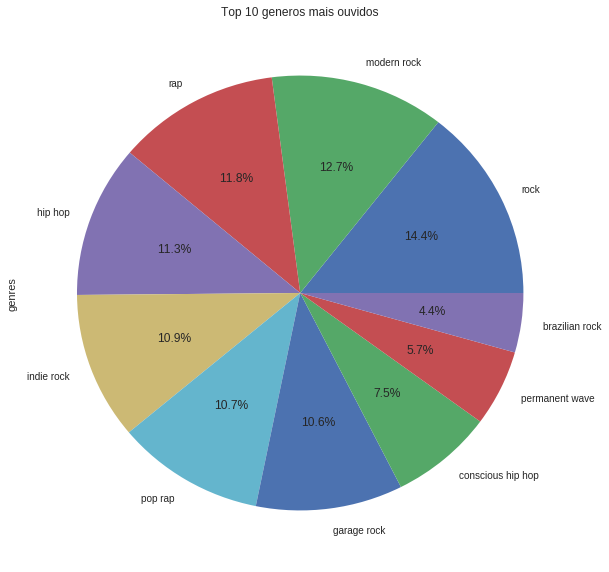

In [16]:
qtd_generos = pdgenres.genres.value_counts(ascending=False).head(10)
print(qtd_generos)
qtd_generos.plot(kind='pie', figsize=(10,10),autopct='%1.1f%%')
plt.title('Top 10 generos mais ouvidos')
plt.show()

Arctic Monkeys          49
Kendrick Lamar          40
Jungle                  26
J. Cole                 23
Logic                   18
Kasabian                16
The Black Keys          12
Eminem                  10
Bring Me The Horizon    10
A Day To Remember        8
Bonobo                   8
Vivendo do Ócio          8
Graveyard                8
The Kooks                7
Snarky Puppy             7
Name: artist, dtype: int64


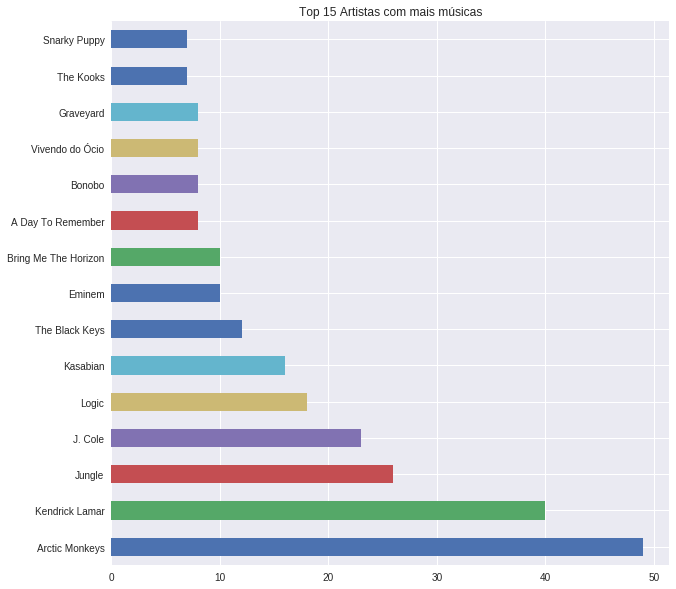

In [17]:
top_artists = pdmusics.artist.value_counts().head(15)
print(top_artists)
top_artists.plot(kind='barh', figsize=(10,10))
plt.title('Top 15 Artistas com mais músicas')
plt.show()

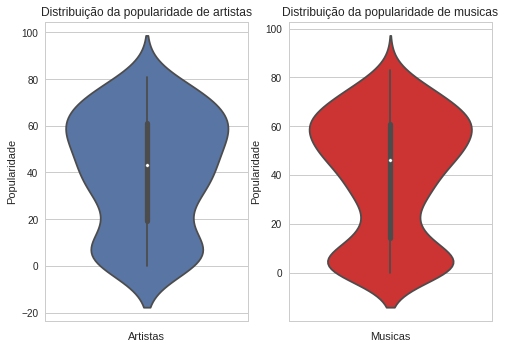

In [18]:
pop_artists = pdmusics.groupby('artist').popularity.mean().sort_values(ascending=False)
pop_artists.head(15)

sns.set(style="whitegrid")

plt.subplot(1,2,1)
sns.violinplot(y=pop_artists)
plt.title('Distribuição da popularidade de artistas')
plt.xlabel('Artistas')
plt.ylabel('Popularidade')

plt.subplot(1,2,2)
sns.violinplot(y='popularity', data=pdmusics, color='red', saturation=0.6)
plt.title('Distribuição da popularidade de musicas')
plt.xlabel('Musicas')
plt.ylabel('Popularidade')

plt.show()

In [ ]:
mlist = isp.get_user_playlists(spfy, 'belzedu', features=True)
namelist = isp.get_user_playlists(spfy, 'belzedu')

In [23]:
musics = []
for playlist, tracks in namelist:
    for track in tracks:
        musics.append(track)
        
result = pd.DataFrame(mlist)
namedata = pd.DataFrame(musics)

alldata = pd.merge(result, namedata, how='left', on='id').drop_duplicates(subset='id')
alldata.info(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 0 to 381
Data columns (total 15 columns):
acousticness        322 non-null float64
danceability        322 non-null float64
energy              322 non-null float64
id                  322 non-null object
instrumentalness    322 non-null float64
key                 322 non-null int64
liveness            322 non-null float64
loudness            322 non-null float64
mode                322 non-null int64
speechiness         322 non-null float64
tempo               322 non-null float64
valence             322 non-null float64
duration_ms         322 non-null int64
name                322 non-null object
popularity          322 non-null int64
dtypes: float64(9), int64(4), object(2)
memory usage: 40.2+ KB


In [ ]:
#alldata.to_csv('gabriel_playlists.csv')
#files.download('gabriel_playlists.csv')

In [24]:
alldata = alldata.sample(frac=1)
alldata = alldata[:500]
alldata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 322 entries, 222 to 355
Data columns (total 15 columns):
acousticness        322 non-null float64
danceability        322 non-null float64
energy              322 non-null float64
id                  322 non-null object
instrumentalness    322 non-null float64
key                 322 non-null int64
liveness            322 non-null float64
loudness            322 non-null float64
mode                322 non-null int64
speechiness         322 non-null float64
tempo               322 non-null float64
valence             322 non-null float64
duration_ms         322 non-null int64
name                322 non-null object
popularity          322 non-null int64
dtypes: float64(9), int64(4), object(2)
memory usage: 40.2+ KB


Text(0.5,1,'Correlações entre colunas')

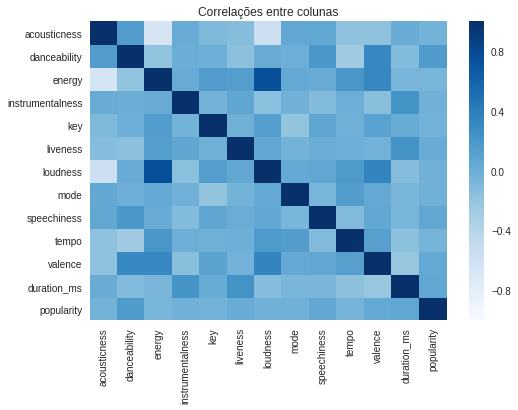

In [25]:
sns.heatmap(alldata.corr(), cmap='Blues')
plt.title('Correlações entre colunas')

In [ ]:
from pandas.tools.plotting import scatter_matrix
test = alldata[['popularity', 'valence', 'acousticness', 'danceability', 'energy', 'instrumentalness']]
scatter_matrix(test, alpha=1, figsize=(23,23))

In [29]:
alt.Chart(alldata).mark_point().encode(
    x='danceability',
    y='valence',
    tooltip='name:N',
)

Chart({
  data:      acousticness  danceability  energy                      id  \
  222      0.104000         0.766  0.6200  6m2LNopVJKsvBB9l7Z1rwn   
  74       0.001830         0.611  0.9480  4HRa9ZWcmZ8JD7UySPu0wT   
  213      0.584000         0.621  0.4810  1Wsyt5It2PYnht0aDYcNyR   
  265      0.003700         0.321  0.9330  3fRVgnVO9c973OIoWwN3V2   
  124      0.139000         0.768  0.6200  20wR5XQpaL1uvVY8gmc4uY   
  268      0.007580         0.539  0.8710  1oRXq9KvTvZQ0yXvO6OBXE   
  167      0.721000         0.473  0.3480  2m2dgHoAEZUkmxamsOwyQg   
  370      0.011000         0.310  0.7000  08mG3Y1vljYA6bvDt4Wqkj   
  196      0.086100         0.356  0.5670  25khomWgBVamSdKw7hzm3l   
  94       0.192000         0.693  0.6950  3kwRiuw2oJoArGs3EusCgn   
  237      0.000824         0.507  0.8470  1bOxsHWMVCf3vAfFMZJvGi   
  275      0.000075         0.380  0.7060  5SqiD82UJWdyXfpwOCtz8K   
  155      0.187000         0.468  0.4590  5pQBbNsXy9lUvskwfwq57u   
  277      0.140000         0.299  0.9730  183dmxsVBTqXz6QYPM0P6b   
  121      0.855000         0.652  0.4550  01VGA34ATxwp0Xo1ldduo2   
  335      0.609000         0.861  0.4450  76MV7OyHilsf3lSjVnkBl3   
  109      0.223000         0.865  0.4720  5FX89IUKm9QJT9ymrmyK4k   
  148      0.810000         0.421  0.0161  0aWMVrwxPNYkKmFthzmpRi   
  257      0.000563         0.486  0.6660  57Xjny5yNzAcsxnusKmAfA   
  34       0.013300         0.546  0.8780  48bo7uexDvAThcRDvEB2W7   
  240      0.194000         0.721  0.6270  63otWg6eWBt3ldXFtDJiXN   
  323      0.018000         0.538  0.8740  6KCiwJ61w9rsDOg5t1RRsQ   
  289      0.424000         0.676  0.6570  70dJEanFPdYuWZumkrnKeX   
  158      0.895000         0.640  0.3300  4kRGpTEcDdZTAbc645OL2U   
  216      0.177000         0.910  0.8040  7DRP2VOMpy1rrk3iYFLCW9   
  71       0.000978         0.388  0.8960  3tvhWi9FFi3UMBpviIMdlA   
  210      0.041800         0.968  0.6000  2coxlAb4MdWJ9br51D0qn7   
  64       0.314000         0.553  0.9360  1YM7fNEGrM1QSuRFHmIdQG   
  146      0.592000         0.469  0.5350  3oD3ifhUOGAk8UgGo1dVwZ   
  264      0.026300         0.545  0.8730  2Uf9WTBWMA8S9Lh3k3Rui6   
  ..            ...           ...     ...                     ...   
  123      0.291000         0.365  0.6550  5u89YD9CJMFVfFqUoeGy2P   
  236      0.240000         0.414  0.6640  7Hk6vSplBGJ6zK9GcGgeIa   
  368      0.000147         0.501  0.8890  57bgtoPSgt236HzfBOd8kj   
  88       0.133000         0.728  0.6070  15EPc80XuFrb2LmOzGjuRg   
  149      0.131000         0.412  0.4900  0iJeENttrA8iKssJMIbXkK   
  212      0.277000         0.923  0.8910  0tOjswPFjpqVQXKaT5OwuL   
  244      0.001470         0.216  0.8820  7vhlwjoNX2gsC4YF1wnUmX   
  341      0.048300         0.641  0.9670  3u1Er1rkjn1oSz1xdZH3ZD   
  171      0.047700         0.735  0.5780  43JngJ3vMsaTL8SiRwEYQp   
  243      0.002250         0.535  0.9480  0S7zL7ae0KpOSPKeFQpHo8   
  380      0.000917         0.433  0.9590  7x8dCjCr0x6x2lXKujYD34   
  224      0.457000         0.574  0.4970  31Nc0X5M29QssTnYAcOGbH   
  170      0.767000         0.530  0.7610  4slAb4LDW7puHxO1SxBAtW   
  320      0.003410         0.427  0.9030  0oWO6fBIJYr9YSGtZ0pS4v   
  344      0.071400         0.763  0.8070  3FtYbEfBqAlGO46NUDQSAt   
  77       0.713000         0.637  0.5030  6JvfBzqZmSiEG5MjM7OcSY   
  203      0.528000         0.810  0.5380  0C80KJWvQWIGjbOiIurV1W   
  136      0.438000         0.488  0.4760  3rFzc8CLVDZ7OOtFa2jPYP   
  198      0.460000         0.673  0.6590  5fEWugSKjh5I5DQHl5tkFc   
  114      0.077300         0.607  0.4760  6F609ICg9Spjrw1epsAnpa   
  372      0.040400         0.285  0.8460  62nQ8UZVqR2RMvkJHkcO2o   
  371      0.002240         0.529  0.7680  6yl8Es1tCYD9WdSkeVLFw4   
  206      0.659000         0.938  0.8800  2KGjEzCBxCv7dt9pefTi7e   
  319      0.497000         0.651  0.7200  1vdN00jfVssgwJBMwmSAoT   
  104      0.172000         0.745  0.3560  3kxfsdsCpFgN412fpnW85Y   
  326      0.086900         0.434  0.9340  3Zv7maR2hR